In [16]:
import os
import pickle
ls = files=os.listdir("Processed")
com = ls[0]
with open('Processed/'+com, 'rb') as f:
    data = pickle.load(f)

In [2]:
train_x = data['X'][0:2500]
test_x = data['X'][2500:]

In [3]:
train_y = data['Y'][0:2500]
test_y = data['Y'][2500:]

In [4]:
train_x = train_x.reshape([-1, 30, 10, 1])
test_x = test_x.reshape([-1, 30, 10, 1])

In [5]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import tensorflow as tf
import os

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [6]:
LR = 1e-4
MODEL_NAME = 'tt-{}-{}.model'.format(LR,'4conv-2fc-ind-'+com)#5conv-basic


In [9]:
tf.reset_default_graph()
convnet = input_data(shape=[None, 30, 10,1], name='input')

convnet = conv_2d(convnet, 64, 4, activation='relu') #--- 30 x 5
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 3, activation='relu') #-----15 x 3
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 3, activation='relu')
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu')
#convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 512, activation='softmax')
convnet = dropout(convnet, 0.70)

#convnet = fully_connected(convnet, 256, activation='softmax')

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_verbose=0)

In [226]:
model.load(MODEL_NAME)

INFO:tensorflow:Restoring parameters from C:\Users\Shachi Shah\Documents\Stocks\tt-0.0001-4conv-3fc-MTNL.BO.model


In [10]:
model.fit({'input': train_x},train_y, n_epoch=20, validation_set=({'input': test_x},test_y), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 799  | total loss: 0.65310 | time: 3.223s
| Adam | epoch: 020 | loss: 0.65310 - acc: 0.6829 -- iter: 2496/2500
Training Step: 800  | total loss: 0.65610 | time: 4.315s
| Adam | epoch: 020 | loss: 0.65610 - acc: 0.6709 | val_loss: 0.65739 - val_acc: 0.6653 -- iter: 2500/2500
--


In [137]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\Shachi Shah\Documents\Stocks\tt-0.0001-4conv-3fc-MTNL.BO.model is not in all_model_checkpoint_paths. Manually adding it.


### RNN

In [13]:
train_x = train_x.reshape([-1, 270, 1])
test_x = test_x.reshape([-1, 270,1])

In [17]:
tf.reset_default_graph()
RNN = input_data(shape=[None, 270, 1], name='input')

RNN = tflearn.lstm(RNN, 90, return_seq=True)

RNN = tflearn.lstm(RNN, 90)

RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = dropout(RNN, 0.90)

RNN = tflearn.regression(RNN, optimizer='adam', loss='categorical_crossentropy', name="output")

model = tflearn.DNN(RNN, tensorboard_verbose=1)

KeyboardInterrupt: 

In [15]:
LR = 1e-4
MODEL_NAME = 'tt-{}-{}.model'.format(LR,'rnn-ind-'+com)#5conv-basic

In [ ]:
model.fit({'input': train_x},train_y, n_epoch=20, validation_set=({'input': test_x},test_y), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

## Image Representation

In [11]:
def makeimage(d1_array):
    import numpy as np
    image=[]
    i=0
    while i<30:
        row=[]
        j=0
        while j<9:
            row.append(np.array([int(d1_array[i][j]*255/10000)]*3))
            j+=1
        image.append(np.array(row))
        i+=1
    image = np.array(image)
    return image
            

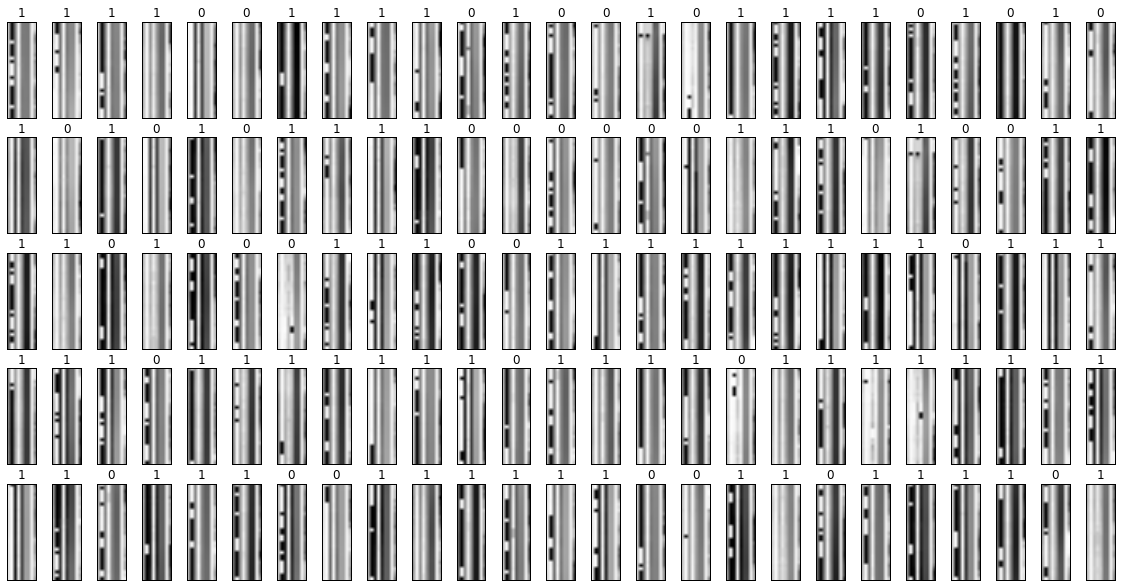

In [12]:
import matplotlib.pyplot as plt
image_counter=0

fig = plt.figure(figsize=(20,10))
while image_counter<125:
    
    Image = makeimage(data['X'][image_counter])

    Actual_Label = np.argmax(data['Y'][image_counter])
    
    y = fig.add_subplot(5,25,image_counter+1)
    y.imshow(Image)
    plt.title(Actual_Label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    image_counter+=1
plt.show() 